# Тема “Обучение без учителя”

###### Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
boston = load_boston()

Проверка лишним не бывает)

boston.data.shape

Создайте датафреймы X и y из этих данных.


In [6]:
X = pd.DataFrame(data = boston.data, columns = boston.feature_names)
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
y = pd.DataFrame(data = boston.target,columns = ['Target'])
y.tail()

,Target
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [43]:
tsne = TSNE(n_components = 2, learning_rate=250,random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

Постройте диаграмму рассеяния на этих данных.

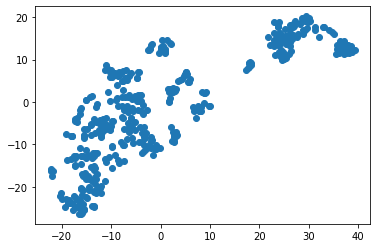

In [45]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

###### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42


In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train)
labels_train

array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

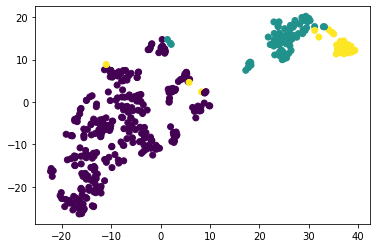

In [48]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.


In [49]:
CRIM = [X_train['CRIM'][labels_train == i].mean() for i in range(0,3) ]
price = [float(y_train[labels_train == i].mean()) for i in range(0,3) ]
pd.DataFrame(data=[CRIM,price],columns=['cluster 1','cluster 2','cluster 3'], index=['CRIM','price'])

,cluster 1,cluster 2,cluster 3
CRIM,0.404863,11.745662,14.360380
price,25.168687,17.442105,13.196774


###### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.


In [50]:
labels_test = kmeans.fit_predict(X_test)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [51]:
CRIM = [X_test['CRIM'][labels_test == i].mean() for i in range(0,3) ]
price = [float(y_test[labels_test == i].mean()) for i in range(0,3) ]
pd.DataFrame(data=[CRIM,price],columns=['cluster 1','cluster 2','cluster 3'], index=['CRIM','price'])

,cluster 1,cluster 2,cluster 3
CRIM,0.246421,8.469302,19.021666
price,23.911594,17.392308,12.814286
